# Getting Started

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('metacri_reviews_scores.csv') 

In [95]:
df.dtypes

genre             object
meta_mixed         int64
meta_negative      int64
meta_positive      int64
metascore          int64
movie_title       object
release_date      object
user_mixed        object
user_negative     object
user_positive     object
userscore        float64
comparison          bool
difference       float64
dtype: object

In [61]:
df.shape
# df[['genre','movie_title']] = df[['genre','movie_title']].astype(str)


(9121, 11)

In [4]:
## user score cleaning 
tbr = ['tbd']
df['userscore'] = df['userscore'].apply(lambda x: np.nan if x in tbr else x)
df = df.dropna(axis=0, how='any')
df['userscore'] = df['userscore'].astype(float)*10


# User vs Critic Summary

In [4]:
df[['userscore','metascore']].mean()

userscore    67.684663
metascore    58.035992
dtype: float64

In [5]:
df[['userscore','metascore']].std()

userscore    14.407663
metascore    17.921912
dtype: float64

In [5]:
df['comparison'] = df['metascore'] > df['userscore']
df['difference'] = df['metascore'] - df['userscore']
print(sum(df['comparison'])/df.shape[0])
df.sort_values('difference',ascending=False)

0.2613491234180889


,genre,meta_mixed,meta_negative,meta_positive,metascore,movie_title,release_date,user_mixed,user_negative,user_positive,userscore,comparison,difference
511,Documentary,1,0,19,80,Knock Down the House,1-May-19,3,328,30,9.0,True,71.0
522,Comedy,4,0,6,64,Adam,14-Aug-19,0,4,0,0.0,True,64.0
534,"Drama,Thriller,Crime",1,0,38,87,Maria Full of Grace,16-Jul-04,5,122,52,27.0,True,60.0
538,"Thriller,Comedy,Romance,Crime",11,2,21,69,Nurse Betty,8-Sep-00,7,99,9,10.0,True,59.0
571,"Drama,Thriller,Romance,Crime",8,0,18,67,Summer of Sam,2-Jul-99,1,100,15,13.0,True,54.0
608,Drama,10,1,20,65,Timecode,28-Apr-00,1,28,5,14.0,True,51.0
618,"Drama,Comedy",4,0,26,81,Happiness,16-Oct-98,10,93,45,31.0,True,50.0
668,"Drama,Comedy",3,1,14,71,Tyrel,5-Dec-18,1,3,0,23.0,True,48.0
648,"Drama,Thriller,Horror,Romance",6,2,10,58,May,7-Feb-03,2,202,16,10.0,True,48.0
706,Comedy,4,0,14,70,In & Out,19-Sep-97,8,48,14,24.0,True,46.0


In [93]:
##top 30 genre indicator 
df[['genre','movie_title']] = df[['genre','movie_title']].astype(str)

In [94]:
df.sample(10)

,genre,meta_mixed,meta_negative,meta_positive,metascore,movie_title,release_date,user_mixed,user_negative,user_positive,userscore,comparison,difference
5878,"Biography,Drama,Thriller",4,1,9,61,The People vs. Fritz Bauer,19-Aug-16,1,0,4,70.0,False,-9.0
2209,"Fantasy,Comedy,Romance",15,0,20,57,13 Going on 30,23-Apr-04,48,13,152,80.0,False,-23.0
5046,"Action,Drama,Thriller",8,0,12,66,Crimson Tide,12-May-95,9,1,37,77.0,False,-11.0
2011,"Action,Sci-Fi,Thriller",2,6,0,26,Alien Outpost,30-Jan-15,7,5,7,51.0,False,-25.0
3702,Drama,1,0,7,81,The Levelling,24-Mar-17,1,2,5,65.0,True,16.0
3558,"Drama,Horror",6,17,0,25,Rings,3-Feb-17,37,47,21,41.0,False,-16.0
5796,"Drama,Mystery,Thriller,Crime",1,1,10,68,A Vigilante,29-Mar-19,5,2,7,59.0,True,9.0
1020,Drama,5,1,1,36,Lotus Eaters,5-Apr-13,0,2,5,73.0,False,-37.0
7286,Documentary,6,0,11,71,Deep Blue,3-Jun-05,0,1,4,66.0,True,5.0
7598,"Drama,Mystery,Thriller",10,1,13,58,Complete Unknown,26-Aug-16,5,2,6,62.0,False,-4.0


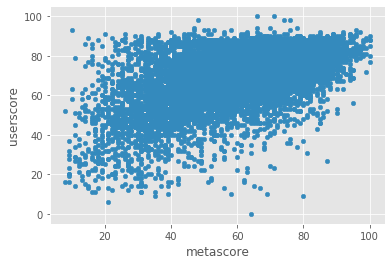

In [8]:
score_df = df[['metascore', 'userscore']]
score_df.plot.scatter('metascore', 'userscore')

# User vs Critic Genre Preference

In [6]:
df_score = df

In [7]:
all_genres = set()
for s in df_score['genre']:
    s = s.split(',')
    all_genres = all_genres.union(s)

In [8]:
def genreFilter(row, genre):
    genres = set(row['genre'].split(','))
    # print(genres)
    if genre in genres:
        return True
    return False

In [9]:
all_genres

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [10]:
for genre in all_genres:
    new_field = 'is' + genre
    df_score[new_field] = df_score.apply(genreFilter, args = (genre, ), axis = 1)

In [66]:
df_score[df_score['isFilm-Noir']]

,genre,meta_mixed,meta_negative,meta_positive,metascore,movie_title,release_date,user_mixed,user_negative,user_positive,userscore,comparison,difference,isComedy,isWestern,isBiography,isNews,isAdventure,isShort,isRomance,isAnimation,isFilm-Noir,isMusic,isHistory,isSport,isSci-Fi,isAdult,isCrime,isFantasy,isWar,isHorror,isDrama,isDocumentary,isMusical,isAction,isMystery,isThriller,isFamily
2766,"Drama,Thriller,Romance,Film-Noir",0,0,16,100,Notorious,6-Sep-46,2,2,30,80.0,True,20.0,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
3153,"Drama,Thriller,Crime,Film-Noir",1,0,21,99,Touch of Evil,1-Feb-58,3,0,32,81.0,True,18.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False
3867,"Mystery,Film-Noir",0,0,15,96,The Maltese Falcon,18-Oct-41,2,1,35,81.0,True,15.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4140,"Mystery,Thriller,Film-Noir",1,0,29,97,The Third Man,3-Sep-49,3,2,45,83.0,True,14.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
5076,"Drama,Mystery,Thriller,Crime,Film-Noir",1,0,16,95,Double Indemnity,6-Jul-44,3,0,28,84.0,True,11.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False
7939,"Thriller,Crime,Film-Noir",1,0,14,88,Strangers on a Train,30-Jun-51,3,0,20,85.0,True,3.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False


In [22]:
df_score.columns[-25:]

Index(['isComedy', 'isWestern', 'isBiography', 'isNews', 'isAdventure',
       'isShort', 'isRomance', 'isAnimation', 'isFilm-Noir', 'isMusic',
       'isHistory', 'isSport', 'isSci-Fi', 'isAdult', 'isCrime', 'isFantasy',
       'isWar', 'isHorror', 'isDrama', 'isDocumentary', 'isMusical',
       'isAction', 'isMystery', 'isThriller', 'isFamily'],
      dtype='object')

In [52]:
pd.options.display.max_columns = 999


scores = []
for genre in df_score.columns[-25:]:
    scores.append([df_score[df_score[genre]].userscore.mean(),df_score[df_score[genre]].metascore.mean()])

genre_comparison = pd.DataFrame(scores)
genre_comparison.index = (df_score.columns[-25:])
genre_comparison.columns=['user','meta']
genre_comparison['difference'] = abs(genre_comparison.user - genre_comparison.meta)
genre_comparison =genre_comparison.sort_values('difference',ascending=False)
genre_comparison.index = [x[2:] for x in genre_comparison.index.tolist()]
genre_comparison.user


Action         65.644578
Film-Noir      82.333333
Horror         62.405436
Sport          70.698473
Fantasy        67.567532
Romance        69.123134
Thriller       65.934487
Crime          69.255994
Comedy         66.376827
Sci-Fi         65.564917
Adventure      67.462567
Mystery        67.554430
Family         66.313056
Musical        70.861878
Western        69.818182
Drama          69.508026
Music          70.158163
Animation      69.935567
War            70.761905
Biography      70.889632
History        70.970745
Adult          51.666667
Documentary    71.673254
News           71.736842
Short          67.250000
Name: user, dtype: float64

In [63]:
import plotly.graph_objects as go

months = genre_comparison.index.tolist()
months

fig = go.Figure()
fig.add_trace(go.Bar(
    x=months,
    y=genre_comparison.user,
    name='userscore',
    marker_color='#7393BC'
))
fig.add_trace(go.Bar(
    x=months,
    y=genre_comparison.meta,
    name='metascore',
    marker_color='#95D845'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-80,width=1000, height=600)
fig.show()